<h1 style = "font-size:60px; background-color: #FBB002 ; color : #000000; text-align: center; border-radius: 25px 100px;"> Storytelling with EDA and model selection and prediction of stroke</h1>

<h3 style="letter-spacing:2px">Hello friends,<br/>
    * Today we are going to explore the data of heart stroke<br/>
    * Make some assumptions about factors which may lead to stroke or not <br/>
    * Selection of right metrics is important as it will define model's true performance<br/>
    * Visualizations are made to easily understand representation of data<br/>
    <font style="font-weight:bold">Please upvote my work If you like it</font>
    <font style="font-weight:bold">If you have any suggestions, Please do let me know in comments, So i can improve notebook</font>
    <font style="font-weight:bold"></font>
    </h3>
    

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib as mpl
mpl.rcParams['font.size']=14
mpl.rcParams['text.color']='black'

In [4]:
df=pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.head().T

,0,1,2,3,4
id,9046,51676,31112,60182,1665
gender,Male,Female,Male,Female,Female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,NaN,32.5,34.4,24.0


Data contains 5110 observations with 12 attributes.:
1) <b>id</b>: unique identifier <br/>
2) <b>gender</b>: Gender of person <br/>
3) <b>age</b>: Age of person<br/>
4) <b>hypertension</b>: Person has hypertension or not? <br/>
5) <b>heart_disease</b>: Person has heart related disease or not?<br/>
6) <b>ever_married</b>: Marital status<br/>
7) <b>work_type</b>: Employment type<br/>
8) <b>Residence_type</b>: Residential category of person<br/>
9) <b>avg_glucose_level</b>: Average glucose level in blood of person<br/>
10) <b>bmi</b>: Body mass index of person<br/>
11) <b>smoking_status</b>: Current/former status of smoking<br/>
12) <b>stroke</b>: Did individual suffered stroke or not<br/>
link: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

<h2>Assumptions:</h2>
1. Is the myth true, Males have more strokes than females<br/>
2. Does age has direct impact on stroke?<br/>
3. People having hypertension are more prone to stroke<br/>
4. Common understanding of heart disease person will suffer heart stroke most of the time?<br/>
5. Does married people gets more stroke than unmarried people?<br/>
6. Do people working in private sector has more chance of stroke?<br/>
7. People living in city are at high risk of stroke?<br/>
8. Glucose level or bmi, above/below some value lead to stroke<br/>
9. Common assumption of smoking people has more stroke. Is it True?<br/>

In [5]:
# Numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [6]:
# Categorical columns
df.describe(include='object').T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [7]:
# Missing Values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<h1>About Data</h1>
1. Categorical and Numerical features are present
<ul>
  <li>Categorical Features: gender, ever_married, work_type, Residence_type,  smoking_status</li>
  <li>Binary Numerical Features: hypertension,heart_disease, stroke</li>
  <li>Continous Numerical Features : age, avg_glucose_level, bmi</li>
</ul>
2. bmi feature has missing values

In [8]:
df_copy=df.copy()

In [9]:
from sklearn import preprocessing

In [10]:
le=preprocessing.LabelEncoder()
df_copy.gender=le.fit_transform(df_copy.gender)
df_copy.ever_married=le.fit_transform(df_copy.ever_married)
df_copy.work_type=le.fit_transform(df_copy.work_type)
df_copy.Residence_type=le.fit_transform(df_copy.Residence_type)
df_copy.smoking_status=le.fit_transform(df_copy.smoking_status)

In [11]:
df_copy.drop(labels='id',inplace=True,axis=1)

In [12]:
Missing=df_copy[df_copy.bmi.isna()]

In [13]:
Temp=df_copy[~df_copy.bmi.isna()]

In [14]:
Temp.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [15]:
X=Temp[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level','smoking_status', 'stroke']]

In [16]:
y=Temp['bmi']

In [17]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [18]:
xgb = XGBRegressor()
parameters = { 'objective':['reg:squarederror'],
              'learning_rate': [.1,.01,.05,.001,.005,.0001], 
              'max_depth': [4, 6, 7,9,10,12],
              'min_child_weight': [4,5,6],
              'n_estimators': [500,1000,1500]}

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=1)



In [19]:
# xgb_grid.fit(X,y)

# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

{'learning_rate': 0.005, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 1000, 'objective': 'reg:squarederror'}

In [20]:
xgb_missing = XGBRegressor(learning_rate=0.005, max_depth=4, min_child_weight= 6, n_estimators= 1000)
xgb_missing.fit(X,y)
predicted=xgb_missing.predict(Missing[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level','smoking_status', 'stroke']])
predicted_bmi=pd.Series(predicted,index=Missing.index)
df.loc[Missing.index,'bmi']=predicted_bmi

In [21]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<h1>We have successfully handled missing value</h1>

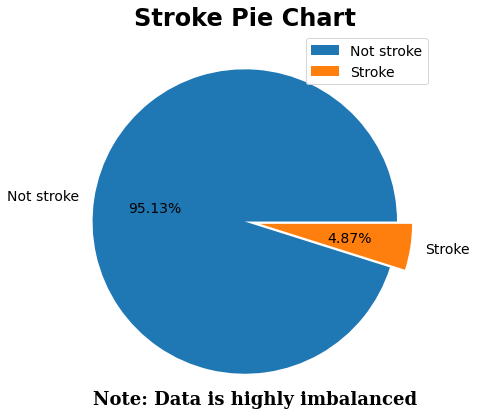

In [22]:
sizes = df['stroke'].value_counts(sort = True)
plt.figure(figsize=(7,7),facecolor='white')

plt.pie(sizes, labels=['Not stroke','Stroke'], autopct='%1.2f%%', explode=[0, 0.1],textprops={'fontsize': 14})
plt.title("Stroke Pie Chart", fontdict={'fontsize': 24,'weight':'bold'})
plt.text(-1,-1.2, 'Note: Data is highly imbalanced ', {'font':'Serif', 'size':18, 'color':'black', 'weight':'bold'})
plt.legend()
plt.show()

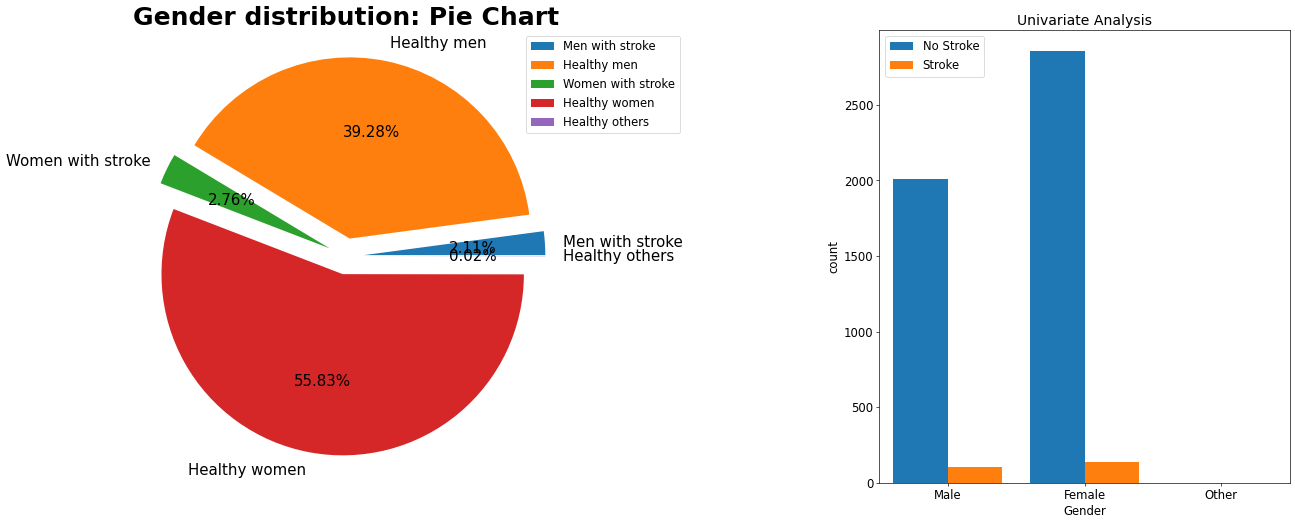

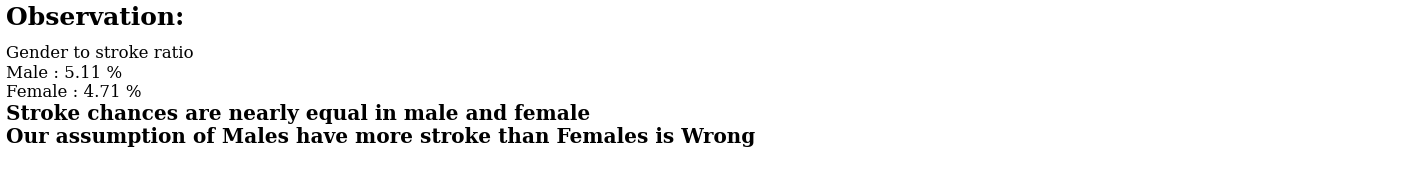

In [23]:
plt.figure(figsize = (30,10), dpi = 60)
plt.subplot(1,3,(1,2))
stroke_men = len(df.loc[(df["stroke"]==1)&(df['gender']=="Male")])
stroke_women = len(df.loc[(df["stroke"]==1)&(df['gender']=="Female")])
stroke_other = len(df.loc[(df["stroke"]==1)&(df['gender']=="Other")])
healthy_men = len(df.loc[(df["stroke"]==0)&(df['gender']=="Male")])
healthy_women = len(df.loc[(df["stroke"]==0)&(df['gender']=="Female")])
healthy_other = len(df.loc[(df["stroke"]==0)&(df['gender']=="Other")])
temp=pd.Series([stroke_men,healthy_men,stroke_women,healthy_women,healthy_other],
               index=['Men with stroke','Healthy men','Women with stroke','Healthy women','Healthy others'])
plt.pie(temp,labels=['Men with stroke','Healthy men','Women with stroke','Healthy women','Healthy others']
        ,explode=[0.1, 0.1,0.1,0.1,0.1], autopct='%1.2f%%',textprops={'fontsize': 18})
plt.title("Gender distribution: Pie Chart", fontdict={'fontsize': 30,'weight':'bold'})
plt.legend( bbox_to_anchor=(0.75, 0.5, 0.5, 0.5))

plt.subplot(1,3,3)
ax=sns.countplot(data=df,x='gender',hue='stroke',saturation=1,dodge=True)
plt.legend(['No Stroke','Stroke'])
plt.xlabel('Gender')
plt.title('Univariate Analysis')

plt.figure(figsize = (30,4), dpi = 60)
ax=plt.subplot(1,1,1)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
mr=df[df['stroke']==1].gender.value_counts(sort=True)['Male']/df['gender'].value_counts(sort=True)['Male']*100
fr=df[df['stroke']==1].gender.value_counts(sort=True)['Female']/df['gender'].value_counts(sort=True)['Female']*100
plt.text(0., 0.9, 'Observation: ', {'font':'Serif', 'size':30, 'color':'black', 'weight':'bold'})
plt.text(0., 0.5,'Gender to stroke ratio\nMale : '+str(round(mr,2))+' %\nFemale : '+str(round(fr,2))+' %',
         {'font':'Serif', 'size':20, 'color':'black', 'weight':'normal'}, alpha = 1)
plt.text(0,0.25,'Stroke chances are nearly equal in male and female \nOur assumption of Males have more stroke than Females is Wrong',{'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'}, alpha = 1)

plt.show()

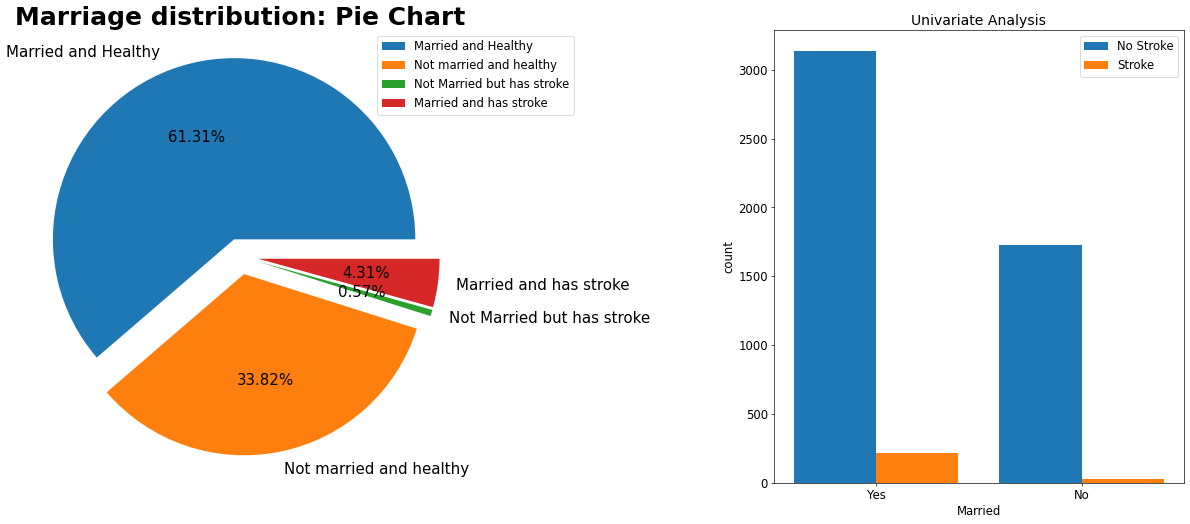

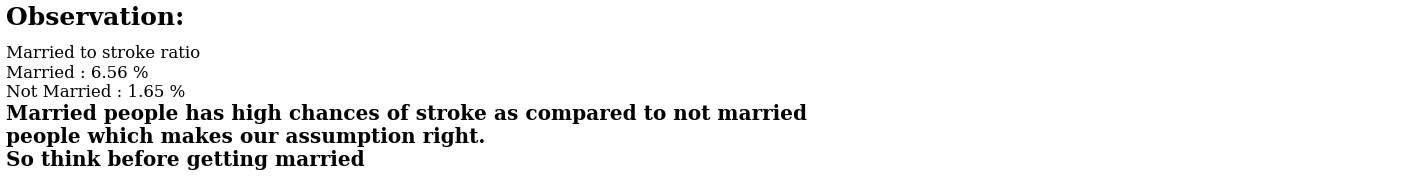

In [24]:
plt.figure(figsize = (30,10), dpi = 60)
plt.subplot(1,3,(1,2))
stroke_married = len(df.loc[(df["stroke"]==1)&(df['ever_married']=="Yes")])
stroke_not_married = len(df.loc[(df["stroke"]==1)&(df['ever_married']=="No")])
healthy_married = len(df.loc[(df["stroke"]==0)&(df['ever_married']=="Yes")])
healthy_not_married = len(df.loc[(df["stroke"]==0)&(df['ever_married']=="No")])
temp=pd.Series([healthy_married,healthy_not_married,stroke_not_married,stroke_married],
               index=['Married and Healthy ','Not married and healthy','Not Married but has stroke','Married and has stroke'])
plt.pie(temp,labels=['Married and Healthy ','Not married and healthy','Not Married but has stroke','Married and has stroke']
        ,explode=[0.1, 0.1,0.1,0.1], autopct='%1.2f%%',textprops={'fontsize': 18})
plt.title("Marriage distribution: Pie Chart", fontdict={'fontsize': 30,'weight':'bold'})
plt.legend( bbox_to_anchor=(0.75, 0.5, 0.5, 0.5))

plt.subplot(1,3,3)
ax=sns.countplot(data=df,x='ever_married',hue='stroke',saturation=1,dodge=True)
plt.legend(['No Stroke','Stroke'])
plt.xlabel('Married')
plt.title('Univariate Analysis')

plt.figure(figsize = (30,4), dpi = 60)
ax=plt.subplot(1,1,1)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
mr=df[df['stroke']==1].ever_married.value_counts(sort=True)['Yes']/df['ever_married'].value_counts(sort=True)['Yes']*100
fr=df[df['stroke']==1].ever_married.value_counts(sort=True)['No']/df['ever_married'].value_counts(sort=True)['No']*100
plt.text(0., 0.9, 'Observation: ', {'font':'Serif', 'size':30, 'color':'black', 'weight':'bold'})
plt.text(0., 0.5, 'Married to stroke ratio\nMarried : '+str(round(mr,2))+' %\nNot Married : '+str(round(fr,2))+' %',
         {'font':'Serif', 'size':20, 'color':'black', 'weight':'normal'}, alpha = 1)
plt.text(0,0.12,'Married people has high chances of stroke as compared to not married \npeople which makes our assumption right.\nSo think before getting married' ,{'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'}, alpha = 1)
plt.show()

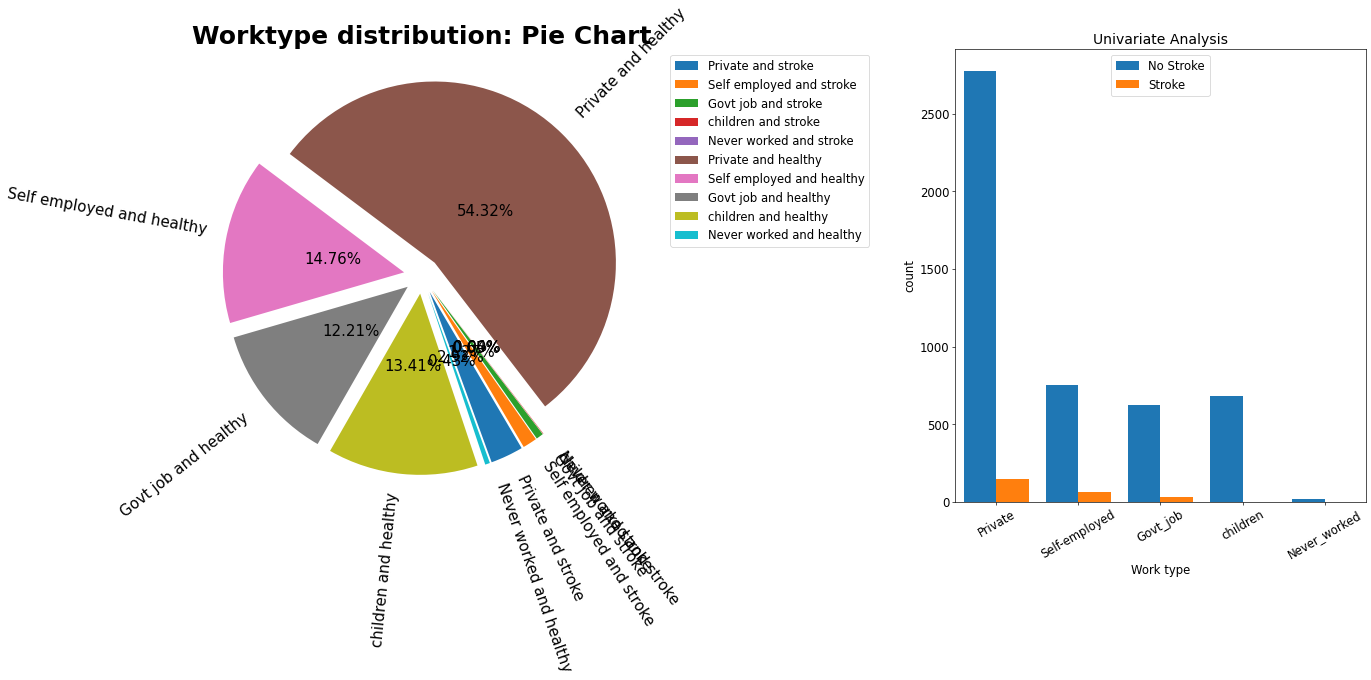

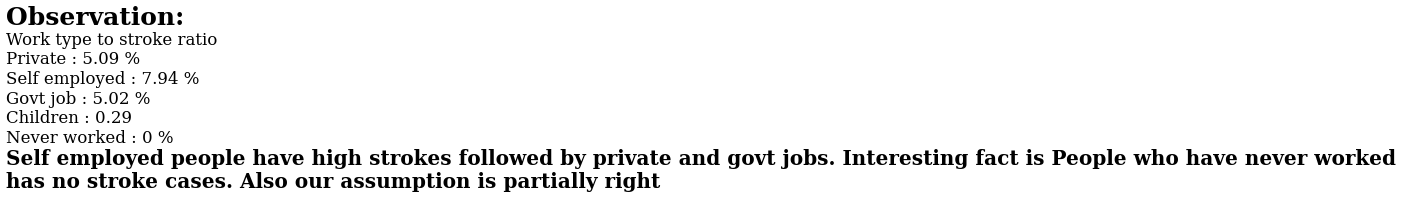

In [25]:
plt.figure(figsize = (30,10), dpi = 60)
plt.subplot(1,3,(1,2))
stroke_Private = len(df.loc[(df["stroke"]==1)&(df['work_type']=="Private")])
stroke_Self_employed = len(df.loc[(df["stroke"]==1)&(df['work_type']=="Self-employed")])
stroke_Govt_job = len(df.loc[(df["stroke"]==1)&(df['work_type']=="Govt_job")])
stroke_children = len(df.loc[(df["stroke"]==1)&(df['work_type']=="children")])
stroke_Never_worked = len(df.loc[(df["stroke"]==1)&(df['work_type']=="Never_worked")])

healthy_Private = len(df.loc[(df["stroke"]==0)&(df['work_type']=="Private")])
healthy_Self_employed = len(df.loc[(df["stroke"]==0)&(df['work_type']=="Self-employed")])
healthy_Govt_job = len(df.loc[(df["stroke"]==0)&(df['work_type']=="Govt_job")])
healthy_children = len(df.loc[(df["stroke"]==0)&(df['work_type']=="children")])
healthy_Never_worked = len(df.loc[(df["stroke"]==0)&(df['work_type']=="Never_worked")])

temp=pd.Series([stroke_Private,stroke_Self_employed,stroke_Govt_job,stroke_children,stroke_Never_worked,
               healthy_Private,healthy_Self_employed,healthy_Govt_job,healthy_children,healthy_Never_worked],
               index=['Private and stroke ','Self employed and stroke','Govt job and stroke','children and stroke','Never worked and stroke'
                     ,'Private and healthy','Self employed and healthy','Govt job and healthy','children and healthy','Never worked and healthy'])
plt.pie(temp,labels=['Private and stroke ','Self employed and stroke','Govt job and stroke','children and stroke','Never worked and stroke'
                     ,'Private and healthy','Self employed and healthy','Govt job and healthy','children and healthy','Never worked and healthy']
        ,explode=[0.1, 0.1,0.1,0.1,0.1,0.1, 0.1,0.1,0.1,0.1], autopct='%1.2f%%',textprops={'fontsize': 18},pctdistance=0.4,startangle=290
       ,rotatelabels=True)
plt.title("Worktype distribution: Pie Chart", fontdict={'fontsize': 30,'weight':'bold'})
plt.legend( bbox_to_anchor=(1, 0.5, 0.5, 0.5))

plt.subplot(1,3,3)
ax=sns.countplot(data=df,x='work_type',hue='stroke',saturation=1,dodge=True)
plt.legend(['No Stroke','Stroke'])
plt.xlabel('Work type')
plt.title('Univariate Analysis')
plt.xticks(rotation=30)

plt.figure(figsize = (30,4), dpi = 60)
ax=plt.subplot(1,1,1)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

private_s=df[df['stroke']==1].work_type.value_counts(sort=True)['Private']/df['work_type'].value_counts(sort=True)['Private']*100
self_employed_s=df[df['stroke']==1].work_type.value_counts(sort=True)['Self-employed']/df['work_type'].value_counts(sort=True)['Self-employed']*100
govt_job_s=df[df['stroke']==1].work_type.value_counts(sort=True)['Govt_job']/df['work_type'].value_counts(sort=True)['Govt_job']*100
children_s=df[df['stroke']==1].work_type.value_counts(sort=True)['children']/df['work_type'].value_counts(sort=True)['children']*100

plt.text(0., 1, 'Observation: ',  {'font':'Serif', 'size':30, 'color':'black', 'weight':'bold'})
plt.text(0., 0.35, 'Work type to stroke ratio\nPrivate : '+str(round(private_s,2))+' %\nSelf employed : '+str(round(self_employed_s,2))+' %'
         +'\nGovt job : '+str(round(govt_job_s,2))+' %\nChildren : '+str(round(children_s,2))+'\nNever worked : 0 %',
         {'font':'Serif', 'size':20, 'color':'black', 'weight':'normal'}, alpha = 1)
plt.text(0,0.1,'Self employed people have high strokes followed by private and govt jobs. Interesting fact is People who have never worked \nhas no stroke cases. Also our assumption is partially right',{'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'}, alpha = 1)

plt.show()

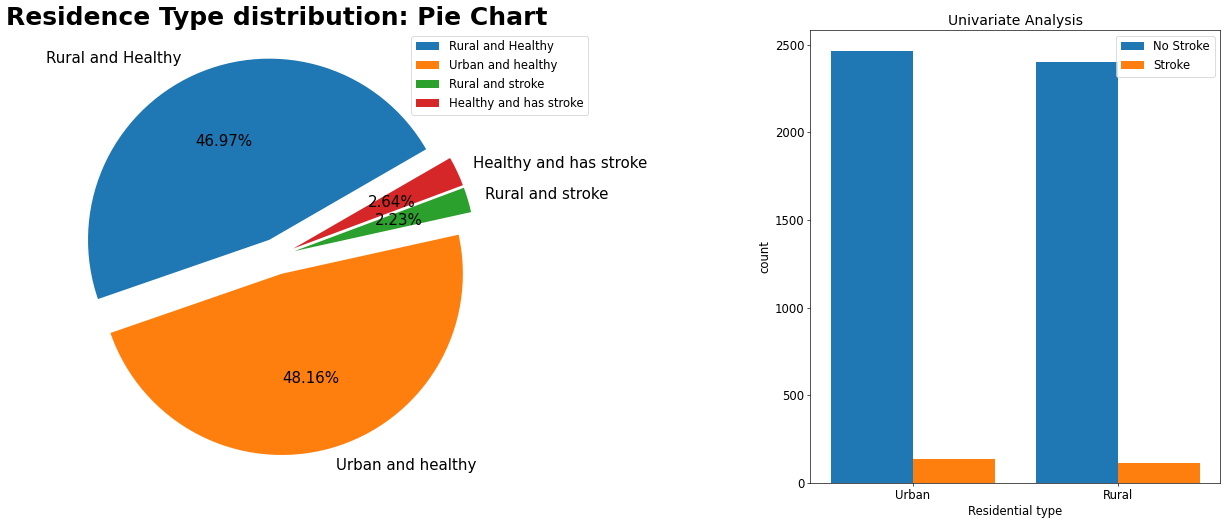

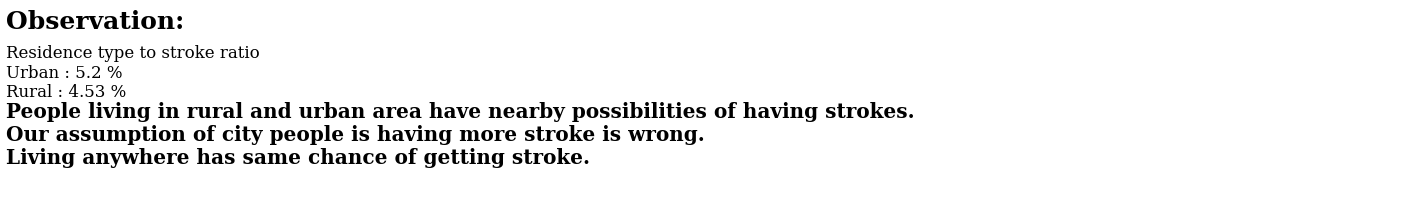

In [26]:
plt.figure(figsize = (30,10), dpi = 60)
plt.subplot(1,3,(1,2))
stroke_urban = len(df.loc[(df["stroke"]==1)&(df['Residence_type']=="Urban")])
stroke_rural = len(df.loc[(df["stroke"]==1)&(df['Residence_type']=="Rural")])
healthy_urban = len(df.loc[(df["stroke"]==0)&(df['Residence_type']=="Urban")])
healthy_rural = len(df.loc[(df["stroke"]==0)&(df['Residence_type']=="Rural")])
temp=pd.Series([healthy_rural,healthy_urban,stroke_rural,stroke_urban],
               index=['Rural and Healthy ','Urban and healthy','Rural and stroke','Healthy and has stroke'])
plt.pie(temp,labels=['Rural and Healthy ','Urban and healthy','Rural and stroke','Healthy and has stroke']
        ,explode=[0.1, 0.1,0.1,0.1], autopct='%1.2f%%',textprops={'fontsize': 18},startangle=30)
plt.title("Residence Type distribution: Pie Chart", fontdict={'fontsize': 30,'weight':'bold'})
plt.legend( bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))

plt.subplot(1,3,3)
ax=sns.countplot(data=df,x='Residence_type',hue='stroke',saturation=1,dodge=True)
plt.legend(['No Stroke','Stroke'])
plt.xlabel('Residential type')
plt.title('Univariate Analysis')

plt.figure(figsize = (30,4), dpi = 60)
ax=plt.subplot(1,1,1)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ur=df[df['stroke']==1].Residence_type.value_counts(sort=True)['Urban']/df['Residence_type'].value_counts(sort=True)['Urban']*100
rr=df[df['stroke']==1].Residence_type.value_counts(sort=True)['Rural']/df['Residence_type'].value_counts(sort=True)['Rural']*100
plt.text(0., 1, 'Observation: ', {'font':'Serif', 'size':30, 'color':'black', 'weight':'bold'})
plt.text(0., 0.62, '\n\nResidence type to stroke ratio\nUrban : '+str(round(ur,2))+' %\nRural : '+str(round(rr,2))+' %',
         {'font':'Serif', 'size':20, 'color':'black', 'weight':'normal'}, alpha = 1)
plt.text(0,0.25,'\nPeople living in rural and urban area have nearby possibilities of having strokes.\nOur assumption of city people is having more stroke is wrong.\n\
Living anywhere has same chance of getting stroke.',{'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'}, alpha = 1)

plt.show()

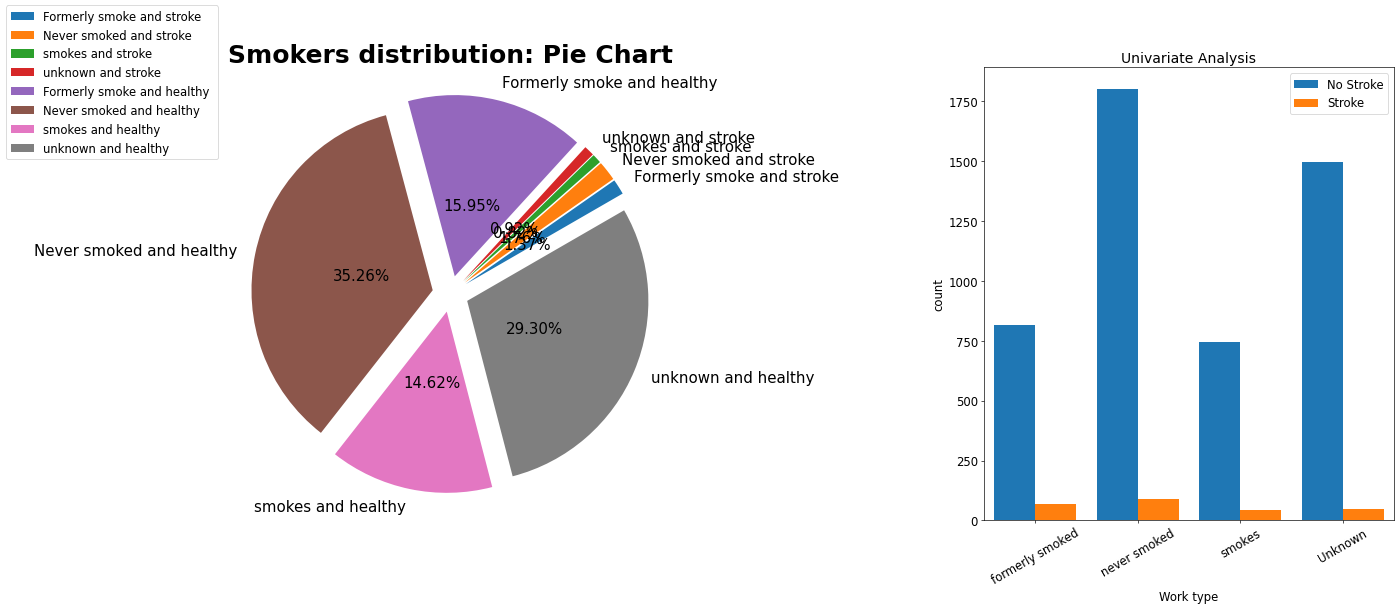

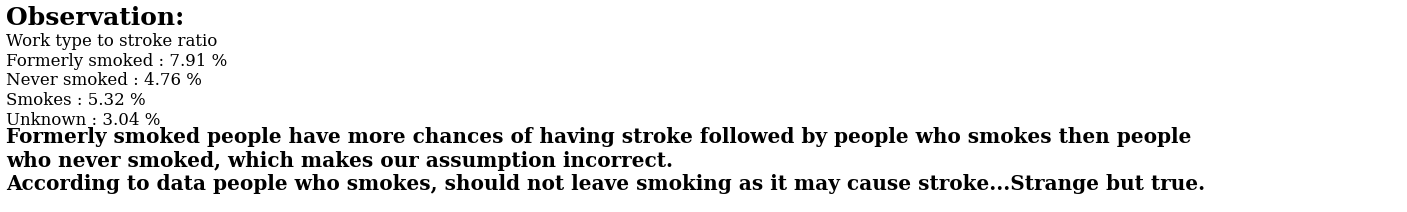

In [27]:
plt.figure(figsize = (30,10), dpi = 60)
plt.subplot(1,3,(1,2))
stroke_formerly_smoked = len(df.loc[(df["stroke"]==1)&(df['smoking_status']=="formerly smoked")])
stroke_never_smoked = len(df.loc[(df["stroke"]==1)&(df['smoking_status']=="never smoked")])
stroke_smokes = len(df.loc[(df["stroke"]==1)&(df['smoking_status']=="smokes")])
stroke_unknown = len(df.loc[(df["stroke"]==1)&(df['smoking_status']=="Unknown")])

healthy_formerly_smoked = len(df.loc[(df["stroke"]==0)&(df['smoking_status']=="formerly smoked")])
healthy_never_smoked = len(df.loc[(df["stroke"]==0)&(df['smoking_status']=="never smoked")])
healthy_smokes = len(df.loc[(df["stroke"]==0)&(df['smoking_status']=="smokes")])
healthy_unknown = len(df.loc[(df["stroke"]==0)&(df['smoking_status']=="Unknown")])

temp=pd.Series([stroke_formerly_smoked,stroke_never_smoked,stroke_smokes,stroke_unknown,
               healthy_formerly_smoked,healthy_never_smoked,healthy_smokes,healthy_unknown],
               index=['Formerly smoke and stroke ','Never smoked and stroke','smokes and stroke','unknown and stroke'
                     ,'Formerly smoke and healthy ','Never smoked and healthy','smokes and healthy','unknown and healthy'])
plt.pie(temp,labels=['Formerly smoke and stroke ','Never smoked and stroke','smokes and stroke','unknown and stroke'
                     ,'Formerly smoke and healthy ','Never smoked and healthy','smokes and healthy','unknown and healthy']
        ,explode=[0.1, 0.1,0.1,0.1,0.1,0.1, 0.1,0.1], autopct='%1.2f%%',textprops={'fontsize': 18},pctdistance=0.4,startangle=30
       ,rotatelabels=False)
plt.title("Smokers distribution: Pie Chart", fontdict={'fontsize': 30,'weight':'bold'})
plt.legend( bbox_to_anchor=(-0.5, 0.65, 0.5, 0.5))

plt.subplot(1,3,3)
ax=sns.countplot(data=df,x='smoking_status',hue='stroke',saturation=1,dodge=True)
plt.legend(['No Stroke','Stroke'])
plt.xlabel('Work type')
plt.title('Univariate Analysis')
plt.xticks(rotation=30)

plt.figure(figsize = (30,4), dpi = 60)
ax=plt.subplot(1,1,1)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
formerly_smoked_s=df[df['stroke']==1].smoking_status.value_counts(sort=True)['formerly smoked']/df['smoking_status'].value_counts(sort=True)['formerly smoked']*100
never_smoked_s=df[df['stroke']==1].smoking_status.value_counts(sort=True)['never smoked']/df['smoking_status'].value_counts(sort=True)['never smoked']*100
smokes_s=df[df['stroke']==1].smoking_status.value_counts(sort=True)['smokes']/df['smoking_status'].value_counts(sort=True)['smokes']*100
unknown_s=df[df['stroke']==1].smoking_status.value_counts(sort=True)['Unknown']/df['smoking_status'].value_counts(sort=True)['Unknown']*100

plt.text(0., 1, 'Observation: ', {'font':'Serif', 'size':30, 'color':'black', 'weight':'bold'})
plt.text(0., 0.45, 'Work type to stroke ratio\nFormerly smoked : '+str(round(formerly_smoked_s,2))+' %\nNever smoked : '+str(round(never_smoked_s,2))+' %'
         +'\nSmokes : '+str(round(smokes_s,2))+' %\nUnknown : '+str(round(unknown_s,2))+' %',
         {'font':'Serif', 'size':20, 'color':'black', 'weight':'normal'}, alpha = 1)
plt.text(0,0.09,'Formerly smoked people have more chances of having stroke followed by people who smokes then people \nwho never smoked, which makes our assumption incorrect.\
 \nAccording to data people who smokes, should not leave smoking as it may cause stroke...Strange but true.',{'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'}, alpha = 1)
plt.show()

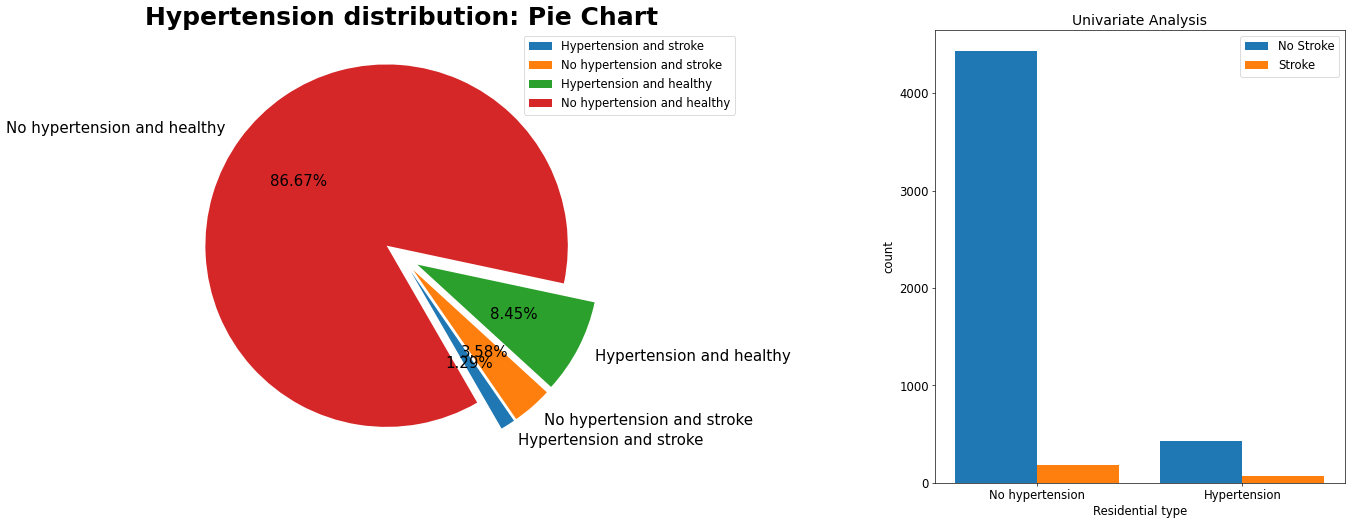

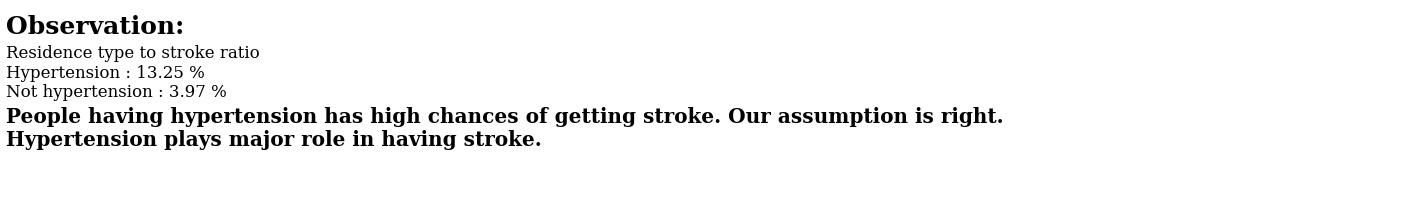

In [28]:
plt.figure(figsize = (30,10), dpi = 60)
plt.subplot(1,3,(1,2))
stroke_hypertension = len(df.loc[(df["stroke"]==1)&(df['hypertension']==1)])
stroke_not_hypertension = len(df.loc[(df["stroke"]==1)&(df['hypertension']==0)])
healthy_hypertension = len(df.loc[(df["stroke"]==0)&(df['hypertension']==1)])
healthy_not_hypertension = len(df.loc[(df["stroke"]==0)&(df['hypertension']==0)])
temp=pd.Series([stroke_hypertension,stroke_not_hypertension,healthy_hypertension,healthy_not_hypertension],
               index=['Hypertension and stroke ','No hypertension and stroke','Hypertension and healthy','No hypertension and healthy'])
plt.pie(temp,labels=['Hypertension and stroke ','No hypertension and stroke','Hypertension and healthy','No hypertension and healthy']
        ,explode=[0.1, 0.1,0.1,0.1], autopct='%1.2f%%',textprops={'fontsize': 18},startangle=-60)
plt.title("Hypertension distribution: Pie Chart", fontdict={'fontsize': 30,'weight':'bold'})
plt.legend( bbox_to_anchor=(0.75, 0.5, 0.5, 0.5))

plt.subplot(1,3,3)
ax=sns.countplot(data=df,x='hypertension',hue='stroke',saturation=1,dodge=True)
plt.legend(['No Stroke','Stroke'])
plt.xlabel('Residential type')
plt.title('Univariate Analysis')
plt.xticks([1,0],['Hypertension','No hypertension'])

plt.figure(figsize = (30,4), dpi = 60)
ax=plt.subplot(1,1,1)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
hyr=df[df['stroke']==1].hypertension.value_counts(sort=True)[1]/df['hypertension'].value_counts(sort=True)[1]*100
nhyr=df[df['stroke']==1].hypertension.value_counts(sort=True)[0]/df['hypertension'].value_counts(sort=True)[0]*100
plt.text(0., 0.95, 'Observation: ', {'font':'Serif', 'size':30, 'color':'black', 'weight':'bold'})
plt.text(0., 0.6, '\n\nResidence type to stroke ratio\nHypertension : '+str(round(hyr,2))+' %\nNot hypertension : '+str(round(nhyr,2))+' %',
         {'font':'Serif', 'size':20, 'color':'black', 'weight':'normal'}, alpha = 1)
plt.text(0,0.33,'People having hypertension has high chances of getting stroke.\
 Our assumption is right.\nHypertension plays major role in having stroke.',{'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'}, alpha = 1)

plt.show()

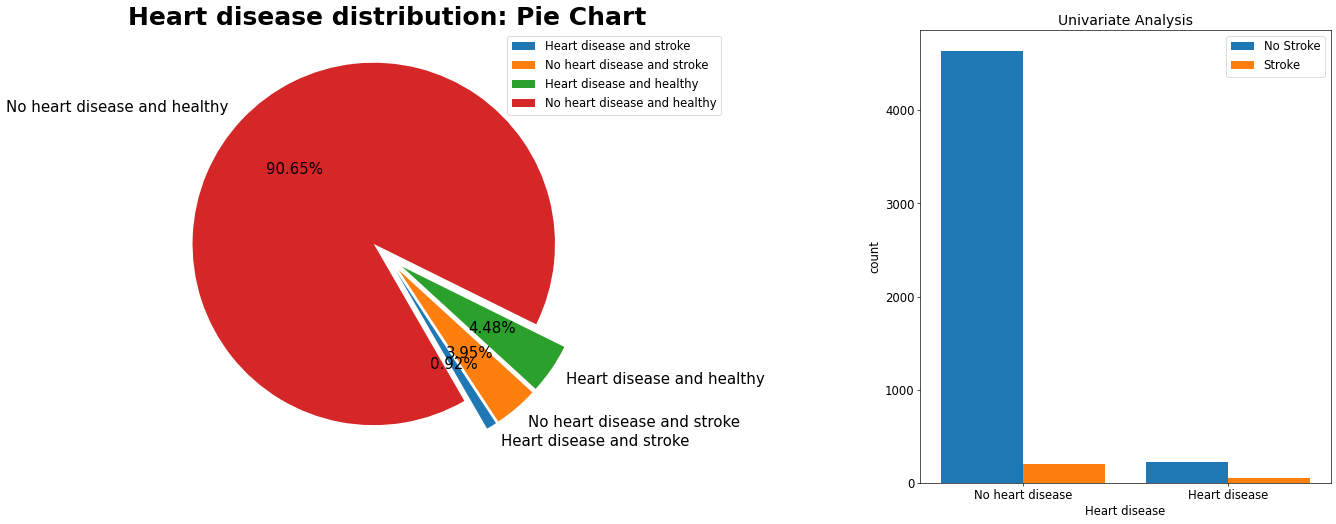

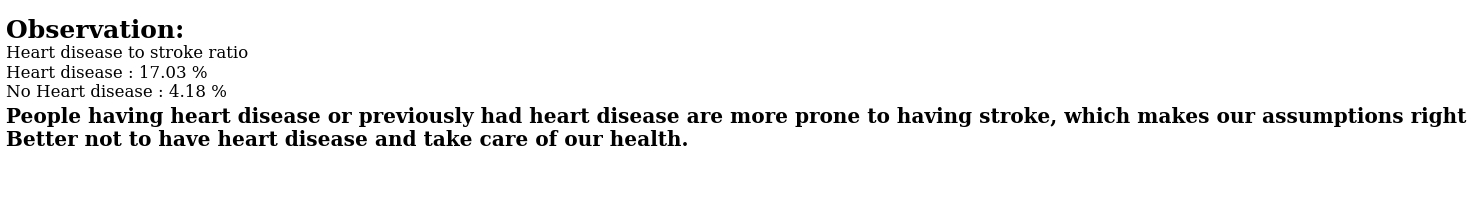

In [29]:
plt.figure(figsize = (30,10), dpi = 60)
plt.subplot(1,3,(1,2))
stroke_heart_disease = len(df.loc[(df["stroke"]==1)&(df['heart_disease']==1)])
stroke_not_heart_disease = len(df.loc[(df["stroke"]==1)&(df['heart_disease']==0)])
healthy_heart_disease = len(df.loc[(df["stroke"]==0)&(df['heart_disease']==1)])
healthy_not_heart_disease = len(df.loc[(df["stroke"]==0)&(df['heart_disease']==0)])
temp=pd.Series([stroke_heart_disease,stroke_not_heart_disease,healthy_heart_disease,healthy_not_heart_disease],
               index=['Heart disease and stroke ','No heart disease and stroke','Heart disease and healthy','No heart disease and healthy'])
plt.pie(temp,labels=['Heart disease and stroke ','No heart disease and stroke','Heart disease and healthy','No heart disease and healthy']
        ,explode=[0.1, 0.1,0.1,0.1], autopct='%1.2f%%',textprops={'fontsize': 18},startangle=-60)
plt.title("Heart disease distribution: Pie Chart", fontdict={'fontsize': 30,'weight':'bold'})
plt.legend( bbox_to_anchor=(0.75, 0.5, 0.5, 0.5))

plt.subplot(1,3,3)
ax=sns.countplot(data=df,x='heart_disease',hue='stroke',saturation=1,dodge=True)
plt.legend(['No Stroke','Stroke'])
plt.xlabel('Heart disease')
plt.title('Univariate Analysis')
plt.xticks([1,0],['Heart disease','No heart disease'])

plt.figure(figsize = (30,4), dpi = 60)
ax=plt.subplot(1,1,1)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
hdr=df[df['stroke']==1].heart_disease.value_counts(sort=True)[1]/df['heart_disease'].value_counts(sort=True)[1]*100
nhdr=df[df['stroke']==1].heart_disease.value_counts(sort=True)[0]/df['heart_disease'].value_counts(sort=True)[0]*100
plt.text(0., 0.9, 'Observation: ', {'font':'Serif', 'size':30, 'color':'black', 'weight':'bold'})
plt.text(0., 0.57,'\n\nHeart disease to stroke ratio\nHeart disease : '+str(round(hdr,2))+' %\nNo Heart disease : '+str(round(nhdr,2))+' %',
         {'font':'Serif', 'size':20, 'color':'black', 'weight':'normal'}, alpha = 1)
plt.text(0,0.3,'People having heart disease or previously had heart disease are more prone to having stroke, which makes our assumptions right\
\nBetter not to have heart disease and take care of our health.',{'font':'Serif', 'size':24, 'color':'black', 'weight':'bold'}, alpha = 1)
plt.show()

# Continous numerical feature

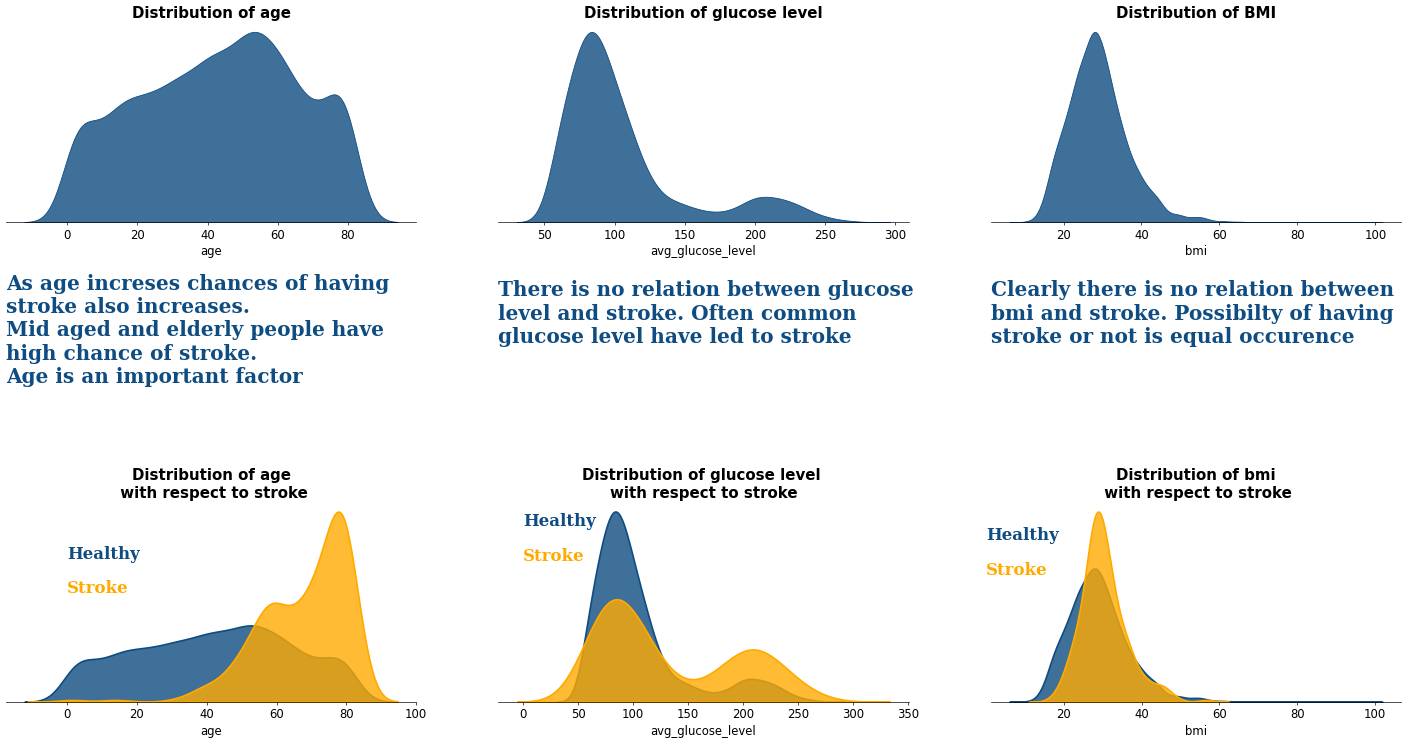

In [30]:
plt.figure(figsize = (30,15), dpi = 60)
ax=plt.subplot(3,3,1)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().set_visible(False)
sns.kdeplot(data=df,x='age',color='#0f4c81',shade=True,alpha=0.8)
plt.title("Distribution of age",fontdict={'fontweight': 'bold', 'size':18})
ax=plt.subplot(3,3,2)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().set_visible(False)
sns.kdeplot(data=df,x='avg_glucose_level',color='#0f4c81',shade=True,alpha=0.8)
plt.title("Distribution of glucose level",fontdict={'fontweight': 'bold', 'size':18})
ax=plt.subplot(3,3,3)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().set_visible(False)
sns.kdeplot(data=df,x='bmi',color='#0f4c81',shade=True,alpha=0.8)
plt.title("Distribution of BMI",fontdict={'fontweight': 'bold', 'size':18})
ax=plt.subplot(3,3,4)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.text(0,0.4,'As age increses chances of having\nstroke also increases. \nMid aged and elderly people have \nhigh chance of stroke.\nAge is an important factor',{'font':'Serif', 'size':24, 'color':'#0f4c81', 'weight':'bold'}, alpha = 1)

ax=plt.subplot(3,3,5)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.text(0,0.6,'There is no relation between glucose\nlevel and stroke. Often common \nglucose level have led to stroke ',{'font':'Serif', 'size':24, 'color':'#0f4c81', 'weight':'bold'}, alpha = 1)

ax=plt.subplot(3,3,6)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.text(0,0.6,'Clearly there is no relation between \nbmi and stroke. Possibilty of having \nstroke or not is equal occurence',{'font':'Serif', 'size':24, 'color':'#0f4c81', 'weight':'bold'}, alpha = 1)

ax=plt.subplot(3,3,7)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().set_visible(False)
sns.kdeplot(data=df[df['stroke']==0],x='age',color='#0f4c81', shade=True,legend=False,linewidth=2,alpha=0.8)
sns.kdeplot(data=df[df['stroke']==1],x='age',color='#ffaa00', shade=True,legend=False,linewidth=2,alpha=0.8)
plt.title('Distribution of age\n with respect to stroke',fontdict={'fontweight': 'bold', 'size':18})
plt.text(0,0.023,'Stroke',{'font':'Serif', 'size':20, 'color':'#ffaa00', 'weight':'bold'}, alpha = 1)
plt.text(0,0.03,'Healthy',{'font':'Serif', 'size':20, 'color':'#0f4c81', 'weight':'bold'}, alpha = 1)
ax=plt.subplot(3,3,8)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().set_visible(False)
sns.kdeplot(data=df[df['stroke']==0],x='avg_glucose_level',color='#0f4c81', shade=True,legend=False,linewidth=2,alpha=0.8)
sns.kdeplot(data=df[df['stroke']==1],x='avg_glucose_level',color='#ffaa00', shade=True,legend=False,linewidth=2,alpha=0.8)
plt.title('Distribution of glucose level \nwith respect to stroke',fontdict={'fontweight': 'bold', 'size':18})
plt.text(0,0.012,'Stroke',{'font':'Serif', 'size':20, 'color':'#ffaa00', 'weight':'bold'}, alpha = 1)
plt.text(0,0.015,'Healthy',{'font':'Serif', 'size':20, 'color':'#0f4c81', 'weight':'bold'}, alpha = 1)
ax=plt.subplot(3,3,9)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().set_visible(False)
sns.kdeplot(data=df[df['stroke']==0],x='bmi',color='#0f4c81', shade=True,legend=False,linewidth=2,alpha=0.8)
sns.kdeplot(data=df[df['stroke']==1],x='bmi',color='#ffaa00', shade=True,legend=False,linewidth=2,alpha=0.8)
plt.title('Distribution of bmi\n with respect to stroke',fontdict={'fontweight': 'bold', 'size':18})
plt.text(0,0.055,'Stroke',{'font':'Serif', 'size':20, 'color':'#ffaa00', 'weight':'bold'}, alpha = 1)
plt.text(0,0.07,'Healthy',{'font':'Serif', 'size':20, 'color':'#0f4c81', 'weight':'bold'}, alpha = 1)
plt.show()

<h3>As data(age, glucose level, bmi) is highly skewed, we will handle it in further steps<\h3>

<h1>Bivariate analysis</h1>

In [31]:
stroke=df[df['stroke']==1]

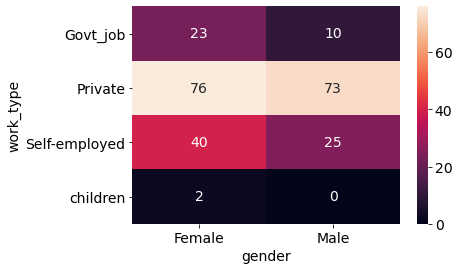

In [32]:
cross_tab=pd.crosstab(stroke['work_type'],stroke['gender'])
sns.heatmap(cross_tab,annot=True)
plt.show()

<h3>Male and Female have highest stroke who work in private organization followed by selfemployed</h3>

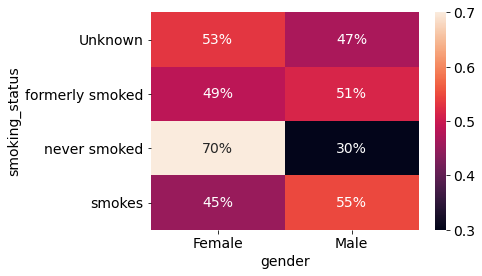

In [33]:
cross_tab=pd.crosstab(stroke['smoking_status'],stroke['gender'],normalize='index')
sns.heatmap(cross_tab,annot=True,fmt="1.0%")
plt.show()

<h3>Females who have never smoked are more prone to stroke</h3>

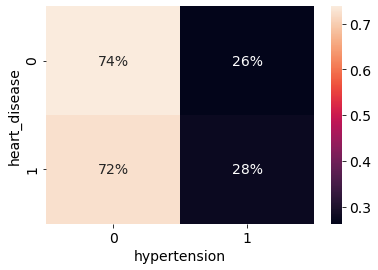

In [34]:
cross_tab=pd.crosstab(stroke['heart_disease'],stroke['hypertension'],normalize='index')
sns.heatmap(cross_tab,annot=True,fmt="1.0%")
plt.show()

<h3>People having no hypertension are mostly getting strokes irrespective of heart disease</h3>

In [35]:
df_pipeline=df.copy()

In [36]:
def ready_pipeline(data):
    data.gender=data.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
    data.ever_married=data.ever_married.apply(lambda x: 1 if x=='Yes' else 0)
    data.Residence_type=data.Residence_type.apply(lambda x: 1 if x=='Urban' else 0)
    data=pd.get_dummies(data,columns=['smoking_status','work_type'])
    data=data.drop(['id'],axis=1)
    return data

In [37]:
df_pipeline=ready_pipeline(df_pipeline)

In [38]:
df_pipeline.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,0,0,1,0,0
1,1,61.0,0,0,1,0,202.21,35.151485,1,0,0,1,0,0,0,0,1,0
2,0,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,1,0,0
3,1,49.0,0,0,1,1,171.23,34.400000,1,0,0,0,1,0,0,1,0,0
4,1,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,0,0,1,0


In [39]:
df_pipeline.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children'],
      dtype='object')

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
y=df_pipeline.pop('stroke')
X=df_pipeline

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [43]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

In [44]:
X_train.age=sc.fit_transform(X_train.age.values.reshape(-1,1))
X_test.age=sc.transform(X_test.age.values.reshape(-1,1))
X_train.bmi=sc.fit_transform(X_train.bmi.values.reshape(-1,1))
X_test.bmi=sc.transform(X_test.bmi.values.reshape(-1,1))
X_train.avg_glucose_level=sc.fit_transform(X_train.avg_glucose_level.values.reshape(-1,1))
X_test.avg_glucose_level=sc.transform(X_test.avg_glucose_level.values.reshape(-1,1))

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import time

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

# Selection of Metrics:
We are selecting F1 score and Recall as main metrics, as data is highly imbalanced, also any model will give us 95% accuracy easily.

In [47]:
model_params = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[4,5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC( probability = True),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]), 
              (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]

In [48]:
result_record=pd.DataFrame(columns=['Algorithm','Accuracy (train)','Accuracy (test)','Recall','Precision','F1 score','Roc Auc score'])

In [49]:
def run_model(x_train,x_test,y_train, y_test):
    start_time=time.time()
    for i,j in model_params:
        t1=time.time()
        grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 5)
        grid.fit(x_train, y_train)
        predict_y=grid.predict(x_test)
        predict_probability=grid.predict_proba(x_test)
        
        best_param = grid.best_params_
        train_accuracy = grid.best_score_
        test_accuracy=accuracy_score(y_test,predict_y)
        test_f1_score=f1_score(y_test,predict_y, average='micro')
        test_precision=precision_score(y_test,predict_y, average='micro')
        test_recall=recall_score(y_test,predict_y, average='micro')
        test_auc_roc=roc_auc_score(y_test,predict_probability[:,1])
        
        print(str(i)+':\nBest Parameters : ',best_param)
        print('Train Accuracy : '+str(round(train_accuracy,2)*100)+' % ')
        print('Test accuracy : '+str(round(test_accuracy,2)*100)+' % ')
        print('F1 score : '+str(round(test_f1_score,2)*100)+' % ')
        print('Precision : '+str(round(test_precision,2)*100)+' % ')
        print('Recall : '+str(round(test_recall,2)*100)+' % ')
        print('Auc Roc score : '+str(round(test_auc_roc,2)*100)+' % ')
        
        result_record.loc[len(result_record.index)]= [i,round(train_accuracy,2)*100,round(test_accuracy,2)*100,round(test_recall,2)*100,round(test_precision,2)*100,round(test_f1_score,2)*100,round(test_auc_roc,2)*100] 
        
        t2=time.time()-t1
        print(str(i)+' finished in '+str(t2)+' seconds')
        print('='*50)
    final_time=time.time()-start_time
    print('All operations are finished in '+str(final_time)+' seconds')

In [50]:
run_model(X_train, X_test, y_train, y_test)

LogisticRegression():
Best Parameters :  {'C': 0.5, 'random_state': 0}
Train Accuracy : 95.0 % 
Test accuracy : 94.0 % 
F1 score : 94.0 % 
Precision : 94.0 % 
Recall : 94.0 % 
Auc Roc score : 83.0 % 
LogisticRegression() finished in 1.6138818264007568 seconds
KNeighborsClassifier():
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 10}
Train Accuracy : 95.0 % 
Test accuracy : 94.0 % 
F1 score : 94.0 % 
Precision : 94.0 % 
Recall : 94.0 % 
Auc Roc score : 67.0 % 
KNeighborsClassifier() finished in 9.564003467559814 seconds
SVC(probability=True):
Best Parameters :  {'C': 0.25, 'kernel': 'linear', 'random_state': 0}
Train Accuracy : 95.0 % 
Test accuracy : 94.0 % 
F1 score : 94.0 % 
Precision : 94.0 % 
Recall : 94.0 % 
Auc Roc score : 69.0 % 
SVC(probability=True) finished in 25.292243242263794 seconds
DecisionTreeClassifier():
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}
Train Accuracy : 91.0 % 
Test accuracy : 91.0 % 
F1 score : 91.0 % 
Precision : 91.0 % 
Reca

# Smote

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
smote=SMOTE()

In [53]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [54]:
x_smote,y_smote=smote.fit_resample(X,y)

In [55]:
y_smote.value_counts()

0    4861
1    4861
Name: stroke, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25)

In [57]:
X_train.age=sc.fit_transform(X_train.age.values.reshape(-1,1))
X_test.age=sc.transform(X_test.age.values.reshape(-1,1))
X_train.bmi=sc.fit_transform(X_train.bmi.values.reshape(-1,1))
X_test.bmi=sc.transform(X_test.bmi.values.reshape(-1,1))
X_train.avg_glucose_level=sc.fit_transform(X_train.avg_glucose_level.values.reshape(-1,1))
X_test.avg_glucose_level=sc.transform(X_test.avg_glucose_level.values.reshape(-1,1))

In [58]:
run_model(X_train, X_test, y_train, y_test)

LogisticRegression():
Best Parameters :  {'C': 0.75, 'random_state': 0}
Train Accuracy : 93.0 % 
Test accuracy : 93.0 % 
F1 score : 93.0 % 
Precision : 93.0 % 
Recall : 93.0 % 
Auc Roc score : 98.0 % 
LogisticRegression() finished in 1.9389715194702148 seconds
KNeighborsClassifier():
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 4}
Train Accuracy : 95.0 % 
Test accuracy : 95.0 % 
F1 score : 95.0 % 
Precision : 95.0 % 
Recall : 95.0 % 
Auc Roc score : 98.0 % 
KNeighborsClassifier() finished in 16.059176445007324 seconds
SVC(probability=True):
Best Parameters :  {'C': 1, 'kernel': 'linear', 'random_state': 0}
Train Accuracy : 94.0 % 
Test accuracy : 94.0 % 
F1 score : 94.0 % 
Precision : 94.0 % 
Recall : 94.0 % 
Auc Roc score : 97.0 % 
SVC(probability=True) finished in 100.78025126457214 seconds
DecisionTreeClassifier():
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}
Train Accuracy : 94.0 % 
Test accuracy : 94.0 % 
F1 score : 94.0 % 
Precision : 94.0 % 
Recall

# Undersampling

In [59]:
from imblearn.under_sampling import ClusterCentroids

In [60]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [61]:
cc=ClusterCentroids()
x_cc,y_cc=cc.fit_resample(X,y)

In [62]:
y_cc.value_counts()

0    249
1    249
Name: stroke, dtype: int64

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x_cc, y_cc, test_size=0.20)

In [64]:
X_train.age=sc.fit_transform(X_train.age.values.reshape(-1,1))
X_test.age=sc.transform(X_test.age.values.reshape(-1,1))
X_train.bmi=sc.fit_transform(X_train.bmi.values.reshape(-1,1))
X_test.bmi=sc.transform(X_test.bmi.values.reshape(-1,1))
X_train.avg_glucose_level=sc.fit_transform(X_train.avg_glucose_level.values.reshape(-1,1))
X_test.avg_glucose_level=sc.transform(X_test.avg_glucose_level.values.reshape(-1,1))

In [65]:
run_model(X_train, X_test, y_train, y_test)

LogisticRegression():
Best Parameters :  {'C': 0.75, 'random_state': 0}
Train Accuracy : 99.0 % 
Test accuracy : 97.0 % 
F1 score : 97.0 % 
Precision : 97.0 % 
Recall : 97.0 % 
Auc Roc score : 98.0 % 
LogisticRegression() finished in 0.27443671226501465 seconds
KNeighborsClassifier():
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 7}
Train Accuracy : 97.0 % 
Test accuracy : 95.0 % 
F1 score : 95.0 % 
Precision : 95.0 % 
Recall : 95.0 % 
Auc Roc score : 100.0 % 
KNeighborsClassifier() finished in 1.0889322757720947 seconds
SVC(probability=True):
Best Parameters :  {'C': 1, 'kernel': 'rbf', 'random_state': 0}
Train Accuracy : 99.0 % 
Test accuracy : 97.0 % 
F1 score : 97.0 % 
Precision : 97.0 % 
Recall : 97.0 % 
Auc Roc score : 100.0 % 
SVC(probability=True) finished in 0.7279329299926758 seconds
DecisionTreeClassifier():
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}
Train Accuracy : 98.0 % 
Test accuracy : 95.0 % 
F1 score : 95.0 % 
Precision : 95.0 % 
Recall

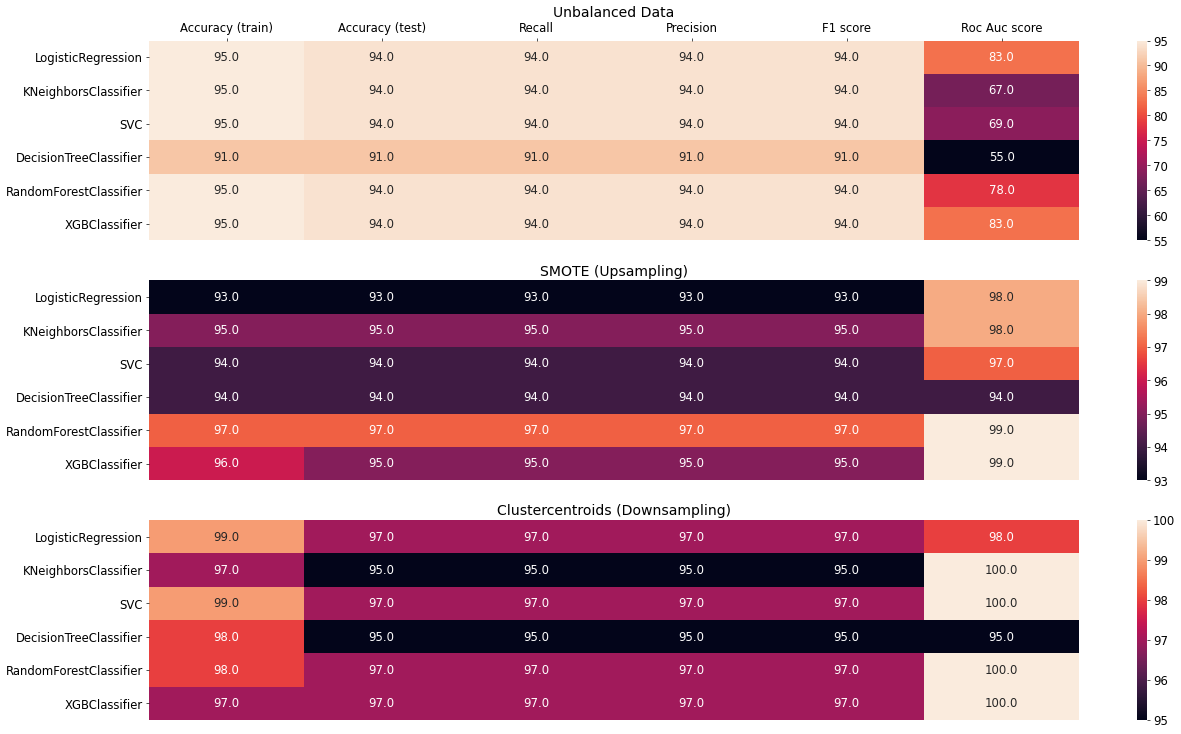

In [66]:
plt.figure(figsize = (25,15), dpi = 60)
plt.subplot(3,1,1)
labels=['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']
ax=sns.heatmap(result_record.iloc[:6,1:],annot=True,yticklabels=labels,fmt='.1f')
ax.xaxis.tick_top()
plt.title('Unbalanced Data')
plt.subplot(3,1,2)
labels=['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']
ax=sns.heatmap(result_record.iloc[6:12,1:],annot=True,yticklabels=labels,xticklabels=False,fmt='.1f')
# ax.xaxis.tick_top()
plt.title('SMOTE (Upsampling)')
plt.subplot(3,1,3)
labels=['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier']
ax=sns.heatmap(result_record.iloc[12:,1:],annot=True,yticklabels=labels,xticklabels=False,fmt='.1f')
ax.xaxis.tick_top()
plt.title('Clustercentroids (Downsampling)')
plt.show()

<h1>Observation:</h1>
<h3>
<ul>
    <li>In unbalanced data we have auc score of 84% in Logistic regression algorithm, which is good.</li>
    <li>When data is upsampled to balance data, auc score is 99% , accuracy and f1 score is 96+% which suggest Randomforestclassifier and XGBclassifier is good for upsampled data.</li>
    <li>In downsampling data all algorithms works well, still data is very less to make it interpretable for future unseen data. </li> 
    </ul>
</h3>

<h1>
    <font style="font-weight:bold">Comment and upvote if you like my work</font><br/>
    <font style="font-weight:bold">Thank You</font>
</h1>